# Assignment 2
* In this assignment you will be working with three data files from iMDB:
    * cast.csv
    * release_dates.csv
    * titles.csv
* Using the appropriate file(s), answer the following questions
* Some questions can be completed with one-liners while others are a bit more involved
* Where appropriate, answers should also provide brief commentary
* Exclude data that doen't make senss, i.e. data from the future
* Once complete upload this notebook to your classwork Github repo and post the link on Canvas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

### 1. Conduct a high level assessment of the three data files, i.e. how many records are there, what kind of data, etc. Summarize your findings with annotation.

In [5]:
Castdf = pd.read_csv('/content/drive/MyDrive/cast.csv')
Castdf.head()


,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [7]:

Redf = pd.read_csv('/content/drive/MyDrive/release_dates.csv')
Redf.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21


In [8]:

Titledf = pd.read_csv('/content/drive/MyDrive/titles.csv')
Titledf.head()

,title,year
0,Ankara ekspresi,1952
1,"Ans Vaterland, ans teure",1915
2,Miss Mohini,2002
3,La vera madre,1999
4,O Amerikanos,1993


Get the number of records (rows) and columns in the DataFrame

In [9]:
Castdf.shape

(3442902, 6)

3442902 rows and 6 columns

In [10]:
Redf.shape

(443486, 4)

443486 rows and 4 columns

In [11]:
Titledf.shape

(226013, 2)

226013 rows and 2 columns

Summary statistics to understand the data

In [12]:
Castdf.dtypes

title         object
year           int64
name          object
type          object
character     object
n            float64
dtype: object

all are categorical variables in the Cast.csv

In [13]:
Castdf.describe()


,year,n
count,3.442902e+06,2.115119e+06
mean,1.987597e+03,1.673178e+01
std,2.837612e+01,3.209100e+01
min,1.894000e+03,1.000000e+00
25%,1.967000e+03,5.000000e+00
50%,1.999000e+03,1.000000e+01
75%,2.011000e+03,2.100000e+01
max,2.115000e+03,3.361300e+04


In [135]:
Redf.describe()

,year
count,443486.000000
mean,1985.554863
std,28.373819
min,1894.000000
25%,1964.000000
50%,1997.000000
75%,2010.000000
max,2115.000000


In [136]:
Titledf.describe()

,year
count,226013.000000
mean,1985.281294
std,29.816257
min,1894.000000
25%,1965.000000
50%,1994.000000
75%,2011.000000
max,2115.000000


### 2. How many movies have the title North by Northwest

In [14]:
num_movies = Castdf[Castdf['title'].str.contains('North by Northwest')]['title'].count()
print(num_movies)

116


### 3. How many version of Hamlet are there, when was the first made? the last?

In [15]:
num_movies2 = Castdf[Castdf['title'].str.contains('Hamlet')]['title'].count()
num_movies2

911

In [16]:
First_year = Castdf['year'].min()
Last_year = Castdf['year'].max()
First_year



1894

In [17]:

Last_year


2115

### 4. List all the movies called Treasure Island from oldest to newest

In [137]:
movies2 = Castdf[Castdf['title'].str.contains('Treasure Island')].sort_values(by='year',ascending=True)
movies2

,title,year,name,type,character,n,decade
322303,Treasure Island,1918,Francis Carpenter,actor,Jim Hawkins,1.0,1910
3387267,Treasure Island,1918,Eleanor Washington,actress,Prologue Player,NaN,1910
1197498,Treasure Island,1918,Raymond Lee,actor,Bit Role,NaN,1910
1226027,Treasure Island,1918,Elmo Lincoln,actor,Prologue Player,NaN,1910
3141571,Treasure Island,1918,Violet Radcliffe,actress,Long John Silver,3.0,1910
...,...,...,...,...,...,...,...
1994566,National Theatre Live: Treasure Island,2015,David Sterne,actor,Blind Pew,NaN,2010
1171224,National Theatre Live: Treasure Island,2015,David Langham,actor,Dick the Dandy,NaN,2010
190349,National Theatre Live: Treasure Island,2015,Oliver Birch,actor,George Badger,NaN,2010
484963,National Theatre Live: Treasure Island,2015,Arthur Darvill,actor,Long John Silver,2.0,2010


### 5. How many movies were made in 1950? 1980? 2000? What conclusions can you draw from these data points?

In [20]:
movies_count = Castdf.groupby('year').size()
movies_count

year
1894     3
1900     2
1905     1
1906    17
1907     5
        ..
2022    16
2023     2
2024     8
2025     9
2115     3
Length: 124, dtype: int64

In [22]:
#Get the number of movies made in 1950, 1980, and 2000
num_movies_1950 = movies_count.get(1950, 0)
num_movies_1950
num_movies_1980 = movies_count.get(1980, 0)
num_movies_1980
num_movies_2000 = movies_count.get(2000, 0)
num_movies_2000

47726

In [23]:
num_movies_1950

22331

In [138]:
num_movies_1980

21191

In [139]:
num_movies_2000

47726

### 6. How big was the cast of Metropolis


In [24]:
# Filter the data for the movie "Metropolis"
metropolis_cast = Castdf[Castdf['title'] == 'Metropolis']
metropolis_cast


,title,year,name,type,character,n
3416,Metropolis,1927,Alfred Abel,actor,Joh Fredersen,1.0
26389,Metropolis,1927,Fritz Alberti,actor,Creative Human - Man who Convinces Babel,NaN
193089,Metropolis,1927,Erwin Biswanger,actor,11811 - Georgy,6.0
542995,Metropolis,1927,Max Dietze,actor,Working Man,NaN
709318,Metropolis,1927,Gustav Fröhlich,actor,Freder - Joh Fredersen's Son,2.0
747304,Metropolis,1927,Heinrich George,actor,Grot - the Guardian of the Heart Machine,7.0
789295,Metropolis,1927,Heinrich Gotho,actor,Master of Ceremonies,NaN
1015520,Metropolis,1927,Georg John,actor,Working Man Who Causes Explosion of M-Machine,NaN
1110313,Metropolis,1927,Rudolf Klein-Rogge,actor,C.A. Rotwang - the Inventor,3.0
1141892,Metropolis,1927,Walter Kuehle,actor,Working Man,NaN


In [26]:
 #Count the number of unique names in the cast for "Metropolis"
cast_size_metropolis = metropolis_cast['name'].nunique()
cast_size_metropolis

31

### 7. How many roles for actors were there 1950's? 1990's

In [27]:
# Filter the data for actors in the 1950s and 1990s
actors_1950s = Castdf[(Castdf['type'] == 'actor') & (Castdf['year'] // 10 == 195)]
actors_1990s = Castdf[(Castdf['type'] == 'actor') & (Castdf['year'] // 10 == 199)]

In [28]:
#Count the number of unique characters played by actors in the 1950s and 1990s
num_characters_1950s = actors_1950s['character'].nunique()
num_characters_1990s = actors_1990s['character'].nunique()

In [29]:
num_characters_1950s

90603

In [30]:
num_characters_1990s

134449

### 8. How many roles for actors & actresses over time? Output should be a line graph

In [31]:
import matplotlib.pyplot as plt


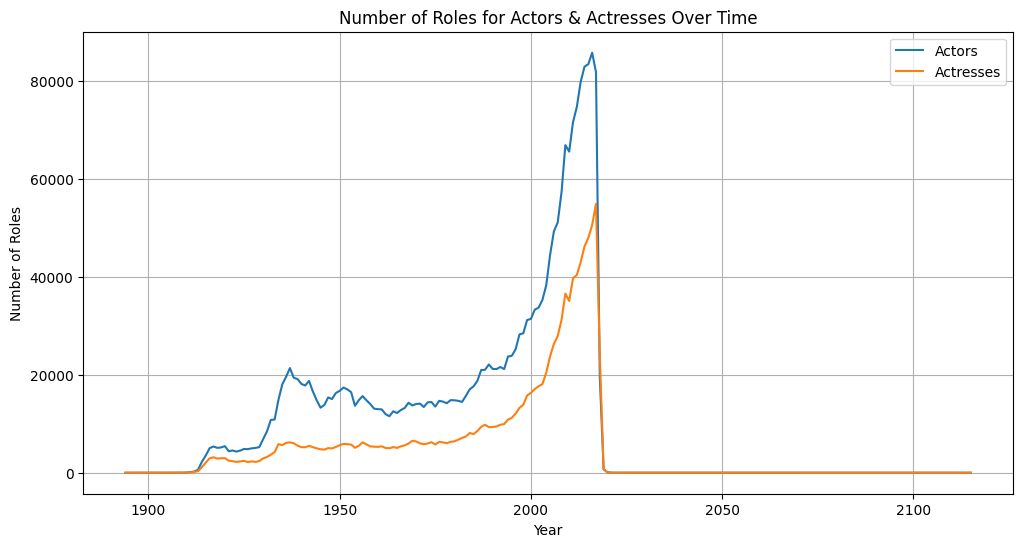

In [32]:
# Filter the data for actors and actresses
actors_data = Castdf[Castdf['type'] == 'actor']
actresses_data = Castdf[Castdf['type'] == 'actress']

# Group the data by year and count the number of roles for actors and actresses
actors_roles_over_time = actors_data.groupby('year').size()
actresses_roles_over_time = actresses_data.groupby('year').size()

# Plotting the line graph
plt.figure(figsize=(12, 6))
plt.plot(actors_roles_over_time.index, actors_roles_over_time.values, label='Actors')
plt.plot(actresses_roles_over_time.index, actresses_roles_over_time.values, label='Actresses')
plt.xlabel('Year')
plt.ylabel('Number of Roles')
plt.title('Number of Roles for Actors & Actresses Over Time')
plt.legend()
plt.grid(True)
plt.show()

### 9. How many "leading roles" were there in the 2000's?

In [34]:
# Filter the data for actors and actresses in the 2000s
actors_2000s = Castdf[(Castdf['type'] == 'actor') & (Castdf['year'] // 10 == 200)]
actresses_2000s = Castdf[(Castdf['type'] == 'actress') & (Castdf['year'] // 10 == 200)]


In [37]:
 #Count the total number of actors and actresses in the 2000s
total_actors_2000s = len(actors_2000s)
total_actresses_2000s = len(actresses_2000s)

In [38]:
total_actors_2000s

440810

In [39]:
total_actresses_2000s

235217

In [40]:
total_actors_2000s+total_actresses_2000s

676027

### 10. How many roles received no ranking in the 2000's? 1950's. What conclusions can you draw from these two data points?

In [43]:
# Filter the data for characters with NaN ranking in the 2000s and 1950s
characters_no_ranking_2000s = Castdf[(Castdf['year'] // 10 == 200) & (Castdf['n'].isnull())]
characters_no_ranking_1950s = Castdf[(Castdf['year'] // 10 == 195) & (Castdf['n'].isnull())]

In [44]:
# Count the number of characters with no ranking in the 2000s and 1950s
num_characters_no_ranking_2000s = len(characters_no_ranking_2000s)
num_characters_no_ranking_1950s = len(characters_no_ranking_1950s)

In [46]:
num_characters_no_ranking_1950s

95406

In [45]:
num_characters_no_ranking_2000s

232037

In 2000s 232037 roles received NO RANKING compared to 1950s where is was only 95406

### 11. Plot the number of films made in each decade

In [48]:
# Create a new column 'decade' based on the year
Castdf['decade'] = (Castdf['year'] // 10) * 10

In [49]:
# Group titles by decade and count the number of titles in each decade
titles_per_decade = Castdf.groupby('decade')['title'].count()

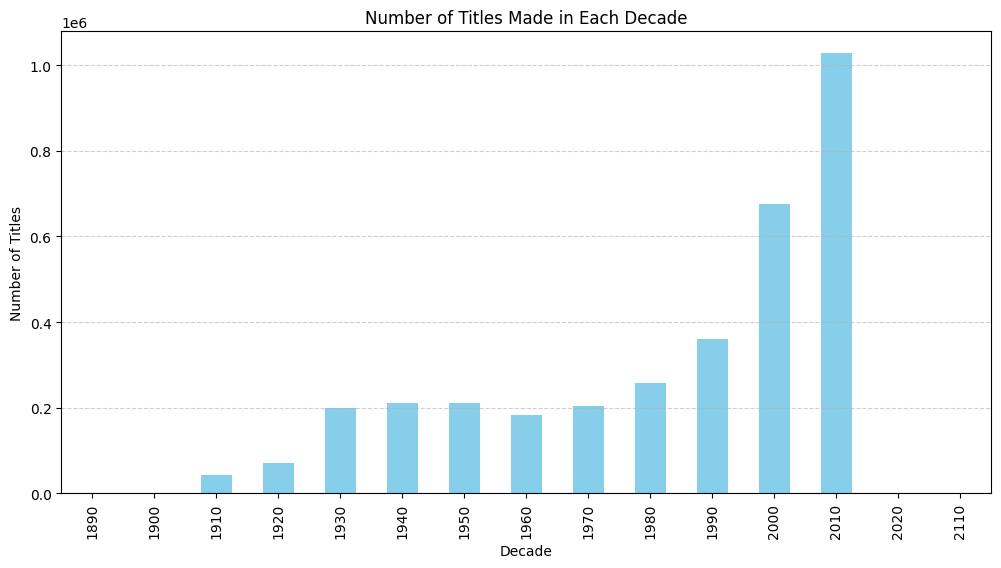

In [50]:
# Plotting the number of titles made in each decade
plt.figure(figsize=(12, 6))
titles_per_decade.plot(kind='bar', color='skyblue')
plt.xlabel('Decade')
plt.ylabel('Number of Titles')
plt.title('Number of Titles Made in Each Decade')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 12. Plot the number of films with a Rustler character over time

In [55]:
# Filter data for titles with the character 'Rustler'
rustler_data = Castdf[Castdf['character'] == 'Rustler']

In [56]:
 #Group titles with 'Rustler' by year and count the number of titles each year
titles_per_year = rustler_data.groupby('year')['title'].count()

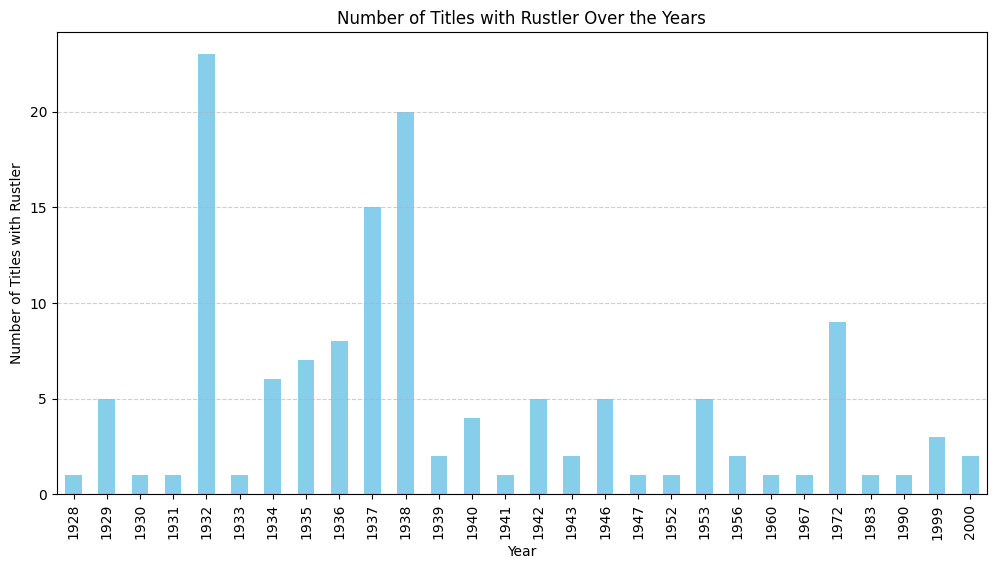

In [57]:
# Plotting the number of titles with 'Rustler' over the years
plt.figure(figsize=(12, 6))
titles_per_year.plot(kind='bar', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Titles with Rustler')
plt.title('Number of Titles with Rustler Over the Years')
plt.grid(axis='y', linestyle='--', alpha=0.6)

### 13. What are the top ten character names of all time?

In [61]:
# Filter out rows where ranking 'n' is not available
filtered_data = Castdf.dropna(subset=['n'])
filtered_data

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
8,"Lapis, Ballpen at Diploma, a True to Life Journey",2014,Jori ' Danilo' Jurado Jr.,actor,Jaime (young),9.0,2010
10,When the Man Went South,2014,Taipaleti 'Atu'ake,actor,Two Palms - Ua'i Paame,8.0,2010
...,...,...,...,...,...,...,...
3442896,Stuttur Frakki,1993,Sveinbjörg Þórhallsdóttir,actress,Flugfreyja,24.0,1990
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980


In [62]:
# Group by character and sum up the rankings
character_rankings = filtered_data.groupby('character')['n'].sum()

In [63]:
# Sort characters based on total ranking in descending order
top_characters = character_rankings.sort_values(ascending=False).head(10)

In [64]:
top_characters

character
Extra                586752.0
Dancer               272930.0
Himself              169593.0
Reporter              80032.0
Policeman             78507.0
Additional Voices     76538.0
Student               73091.0
Herself               69005.0
Nurse                 68164.0
Doctor                67170.0
Name: n, dtype: float64

### 14. Which actor appeared in the most films in the 1990's decade?

In [74]:
# Filter the data for actors and movies from the 1990s decade
actor_data_1990s = Castdf[(Castdf['type'] == 'actor') & (Castdf['year'] // 10 == 199)]
actor_data_1990s


,title,year,name,type,character,n,decade
12,Mixing Nia,1998,Michael 'babeepower' Viera,actor,Rapper,NaN,1990
19,Mariano Mison... NBI,1997,Joseph 'Byron' Sese,actor,Putik's Son,31.0,1990
25,Pelotazo nacional,1993,Félix 'El Gato',actor,Rebolledo,12.0,1990
32,Killing Device,1993,Van 'Igor' Morrison,actor,Jeep Driver,51.0,1990
38,Violencia urbana,1996,Néstor 'Kick Boxer',actor,Montaña,21.0,1990
...,...,...,...,...,...,...,...
2317594,Stuttur Frakki,1993,Randver Þorláksson,actor,Örvar,8.0,1990
2317595,The Juniper Tree,1990,Geirlaug Sunna Þormar,actor,Jónas,5.0,1990
2317597,Dansinn,1998,Gísli I. Þorsteinsson,actor,Sigmenn,29.0,1990
2317602,Stuttur Frakki,1993,Þorvaldur Bjarni Þorvaldsson,actor,Himself (Todmobile),31.0,1990


In [77]:
# Count the number of titles each actor appeared in during the 1990s
actor_title_counts = actor_data_1990s.groupby('name')['title'].count()
actor_title_counts

name
'Big Philly' Johnson            1
'Chico' Hernandez               1
'Crazy Steve' Olsen             1
'Diamond' Tim Pleshaw           2
'Evil' Ted Smith                8
                               ..
Þorvaldur Bjarni Þorvaldsson    1
Þröstur Guðbjartsson            1
Þórir Bergsson                  2
Þórir Steingrímsson             1
Þórir Waagfjörð                 1
Name: title, Length: 125138, dtype: int64

In [78]:
# Identify the actor with the highest count of titles
most_titles_actor = actor_title_counts.idxmax()

In [79]:
most_titles_actor

'Shakti Kapoor'

### 15. What are the top 10 roles that start with Science?

In [133]:
# Filter for characters that start with "Science" in the title
science_characters = Castdf[Castdf['title'].str.startswith('Science')]
science_characters

,title,year,name,type,character,n,decade
104861,Science Fiction,2002,Guy Baguet,actor,Kasper's Father,23.0,2000
104862,Science Fiction,2002,Jurre Baguet,actor,Kasper,3.0,2000
144047,Science Fiction,2003,Dean Baykan,actor,Der Roman aus der Pizzeria,NaN,2000
191251,Science Fiction,2003,Arved Birnbaum,actor,Jörg,1.0,2000
211742,Science Fiction,2002,Ignace Bolle,actor,Lab Assistant #2,16.0,2000
429235,Science Fiction,2002,Staf Coppens,actor,Lab Assistant,10.0,2000
498650,Science Fiction,2002,Koen De Bouw,actor,Rick Decker,6.0,2000
596255,Science Fiction,2003,Klaus Ebert,actor,Seminarteilnehmer,21.0,2000
601612,Science Fiction,2003,Siegfried Effenberger,actor,Mann in der Werbeagentur,8.0,2000
743535,Science Fiction,2002,David Geclowicz,actor,Andreas,1.0,2000


In [134]:
# Get the top 10 characters based on their rank (n)
top_10_characters = science_characters.sort_values(by='n').head(10)['character']
top_10_characters

191251                        Jörg
743535                     Andreas
2999677                       Vero
1979887                     Marius
104862                      Kasper
2956947                       Anja
2606264    Anjas Schwester Barbara
2045576                     Wietse
2258965                   Hotelier
3354762              Rachel Decker
Name: character, dtype: object

### 16. What film has the largest cast

In [96]:
# Group by title and count the number of characters in each cast
title_cast_counts = Castdf.groupby('title')['character'].count()

In [97]:
# Identify the title with the largest cast
largest_cast_title = title_cast_counts.idxmax()

In [98]:
largest_cast_title

'Around the World in 80 Days'

### 17. Generate descriptive statistics for cast size. Briefly comment on the results

In [101]:
# Calculate descriptive statistics for cast size
cast_size_stats = Castdf.groupby('title')['character'].count().describe()
cast_size_stats

count    168255.000000
mean         20.462405
std          24.206617
min           1.000000
25%           6.000000
50%          13.000000
75%          26.000000
max        1364.000000
Name: character, dtype: float64

Mean/avg.size of a cast is 20 members. Least member as cast was 1 and largest cast of any title was 1364 members

### 18. How many films has Natalie Portman been in in each year throughout her career?

In [103]:
# Filter the data for titles where Natalie Portman appears
natalie_data = Castdf[Castdf['name'] == 'Natalie Portman']
natalie_data

,title,year,name,type,character,n,decade
3127057,A Tale of Love and Darkness,2015,Natalie Portman,actress,Fania,1.0,2010
3127058,Anywhere But Here,1999,Natalie Portman,actress,Ann August,2.0,1990
3127059,Beautiful Girls,1996,Natalie Portman,actress,Marty,9.0,1990
3127060,Black Swan,2010,Natalie Portman,actress,Nina Sayers,1.0,2010
3127061,Black Swan,2010,Natalie Portman,actress,The Swan Queen,1.0,2010
3127062,Brothers,2009,Natalie Portman,actress,Grace Cahill,3.0,2000
3127063,Closer,2004,Natalie Portman,actress,Alice,3.0,2000
3127064,Cold Mountain,2003,Natalie Portman,actress,Sara,7.0,2000
3127065,Domino One,2005,Natalie Portman,actress,Dominique Bellamy,NaN,2000
3127066,Everyone Says I Love You,1996,Natalie Portman,actress,Laura,16.0,1990


In [105]:
 #Group by year and count the number of titles each year
titles_per_year = natalie_data.groupby('year')['title'].nunique()
print(titles_per_year)

year
1995    1
1996    3
1999    2
2000    1
2001    1
2002    1
2003    1
2004    2
2005    4
2006    1
2007    3
2008    1
2009    2
2010    3
2011    3
2013    1
2015    4
2016    3
2017    1
Name: title, dtype: int64


### 19. How many films did Natalie Portman appear in each year where where she was either the top star or co-star?

In [110]:
# Filter the data for titles where Natalie Portman appears as either the top star (n=1) or co-star (n=2)
natalie_data = Castdf[(Castdf['name'] == 'Natalie Portman') & ((Castdf['n'] == 1) | (Castdf['n'] == 2))]
natalie_data

,title,year,name,type,character,n,decade
3127057,A Tale of Love and Darkness,2015,Natalie Portman,actress,Fania,1.0,2010
3127058,Anywhere But Here,1999,Natalie Portman,actress,Ann August,2.0,1990
3127060,Black Swan,2010,Natalie Portman,actress,Nina Sayers,1.0,2010
3127061,Black Swan,2010,Natalie Portman,actress,The Swan Queen,1.0,2010
3127067,Free Zone,2005,Natalie Portman,actress,Rebecca,1.0,2000
3127069,Goya's Ghosts,2006,Natalie Portman,actress,Inés,2.0,2000
3127070,Goya's Ghosts,2006,Natalie Portman,actress,Alicia,2.0,2000
3127074,Jackie (V),2016,Natalie Portman,actress,Jackie Kennedy,1.0,2010
3127075,Jane Got a Gun,2015,Natalie Portman,actress,Jane Hammond,1.0,2010
3127077,Love and Other Impossible Pursuits,2009,Natalie Portman,actress,Emilia Greenleaf,1.0,2000


In [108]:
# Group by year and count the number of titles each year
titles_per_year = natalie_data.groupby('year')['title'].nunique()

In [109]:
print(titles_per_year)

year
1999    1
2000    1
2002    1
2005    3
2006    1
2007    1
2008    1
2009    1
2010    1
2011    2
2013    1
2015    2
2016    2
Name: title, dtype: int64


### 20. Determine how many roles for actor or actress by decade. Plot the output

In [112]:
# Filter the data for type=actor or type=actress
actor_actress_data = Castdf[(Castdf['type'] == 'actor') | (Castdf['type'] == 'actress')]
actor_actress_data

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


In [114]:
# Create a new column for the decade based on the year
actor_actress_data['decade'] = (actor_actress_data['year'] // 10) * 10
actor_actress_data

,title,year,name,type,character,n,decade
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0,2010
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0,1980
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0,2010
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN,2010
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN,2010
...,...,...,...,...,...,...,...
3442897,Foxtrot,1988,Lilja Þórisdóttir,actress,Dóra,24.0,1980
3442898,Niceland (Population. 1.000.002),2004,Sigríður Jóna Þórisdóttir,actress,Woman in Bus,26.0,2000
3442899,Skammdegi,1985,Dalla Þórðardóttir,actress,Hjúkrunarkona,9.0,1980
3442900,U.S.S.S.S...,2003,Kristín Andrea Þórðardóttir,actress,Afgr.dama á bensínstöð,17.0,2000


In [115]:
# Group by decade and count the number of characters
characters_per_decade = actor_actress_data.groupby('decade')['character'].count()
characters_per_decade

decade
1890          3
1900         70
1910      43129
1920      71938
1930     198570
1940     210670
1950     209890
1960     182616
1970     202992
1980     257683
1990     361218
2000     676027
2010    1027836
2020        257
2110          3
Name: character, dtype: int64

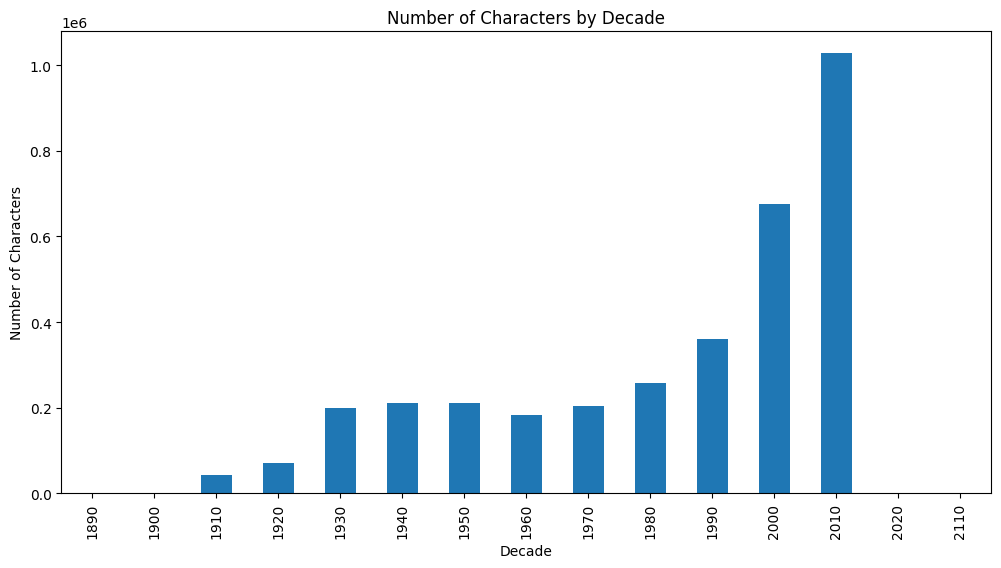

In [116]:
# Plotting the output
characters_per_decade.plot(kind='bar', figsize=(12, 6), title='Number of Characters by Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Characters')
plt.show()

### 21. Determine and comment on the day of the week that movies are released. What is notable about release days and months throughout the year? (Use pd.pivot_table)

In [120]:
# Convert the 'date' column to datetime format
Redf['date'] = pd.to_datetime(Redf['date'])
Redf

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#BKKY,2016,Cambodia,2017-10-12
2,#Beings,2015,Romania,2015-01-29
3,#Captured,2017,USA,2017-09-05
4,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
...,...,...,...,...
443481,xXx: State of the Union,2005,Uruguay,2005-04-29
443482,xXx: State of the Union,2005,Poland,2005-06-03
443483,xXx: State of the Union,2005,Turkey,2005-06-03
443484,xXx: State of the Union,2005,China,2005-06-17


In [123]:
# Extract the day of the week from the 'date' column
Redf['day_of_week'] = Redf['date'].dt.day_name()
Redf['day_of_week']

0            Friday
1          Thursday
2          Thursday
3           Tuesday
4         Wednesday
            ...    
443481       Friday
443482       Friday
443483       Friday
443484       Friday
443485       Friday
Name: day_of_week, Length: 443486, dtype: object

In [126]:
# Create a pivot table to analyze the day of the week titles are released
pivot_table = pd.pivot_table(Redf, index='day_of_week', values='title', aggfunc='count')
pivot_table

,title
day_of_week,
Friday,163174
Monday,37210
Saturday,31332
Sunday,15823
Thursday,125746
Tuesday,16762
Wednesday,53439


On Friday most number of movies were released comapred to any day of the week. Thursday was the day of the week when 2nd highest number of moviews were released in a week.

### 22. Can you plot the pivot table? Is the output "correct"? Can you fix it?

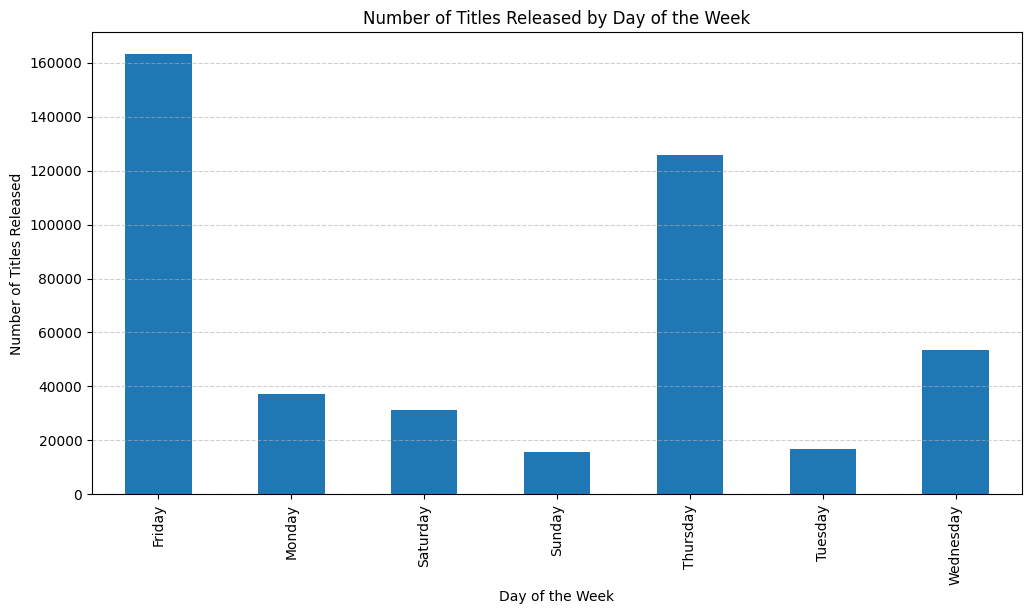

In [127]:
# Plotting the pivot table
pivot_table.plot(kind='bar', figsize=(12, 6), legend=None)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles Released')
plt.title('Number of Titles Released by Day of the Week')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

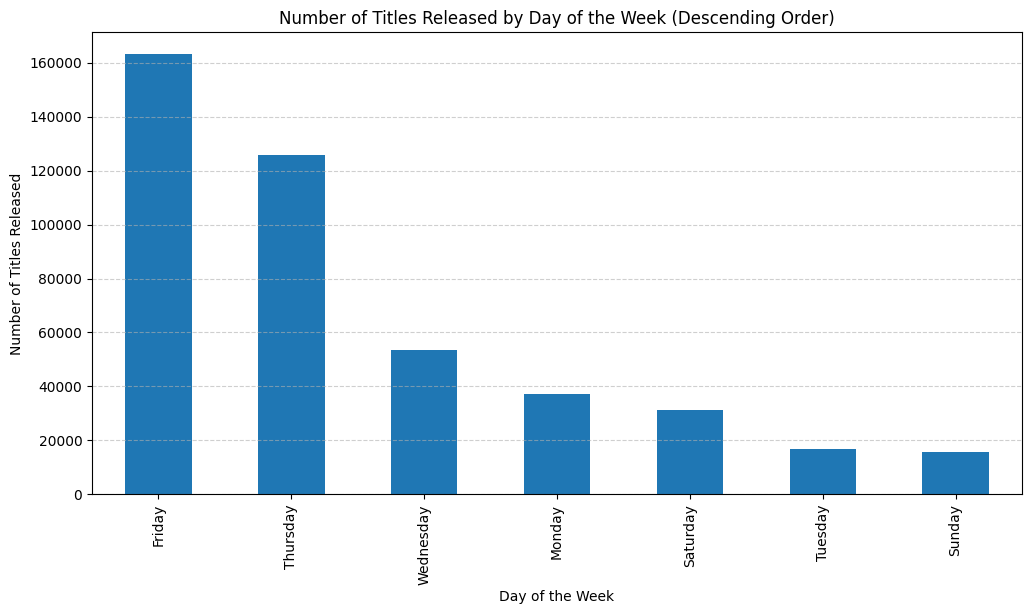

In [128]:
# Sort the pivot table in descending order
pivot_table = pivot_table.sort_values(by='title', ascending=False)

# Plotting the sorted pivot table
pivot_table.plot(kind='bar', figsize=(12, 6), legend=None)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Titles Released')
plt.title('Number of Titles Released by Day of the Week (Descending Order)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

### 23. What films did actors in Star Wars go on to appear in?

In [129]:
# Filter for type=actor in the movie "Star Wars"
star_wars_actors = Castdf[(Castdf['title'] == 'Star Wars') & (Castdf['type'] == 'actor')]
star_wars_actors

,title,year,name,type,character,n,decade
59909,Star Wars,1977,David Ankrum,actor,Red Two,NaN,1970
82411,Star Wars,1977,Graham Ashley,actor,Gold Five,23.0,1970
91760,Star Wars,1977,Mark Anthony Austin,actor,Boba Fett (special edition),NaN,1970
110035,Star Wars,1977,Kenny Baker,actor,R2-D2,7.0,1970
145346,Star Wars,1977,Scott Beach,actor,Stormtrooper,NaN,1970
...,...,...,...,...,...,...,...
2211132,Star Wars,1977,Harold Weed,actor,Ketwol,NaN,1970
2211133,Star Wars,1977,Harold Weed,actor,Melas,NaN,1970
2222386,Star Wars,1977,Bill Weston,actor,Stormtrooper,NaN,1970
2245262,Star Wars,1977,Steve 'Spaz' Williams,actor,Mos Eisley Citizen (special edition),NaN,1970


In [130]:
# Get the unique actors in "Star Wars"
star_wars_actor_names = star_wars_actors['character'].unique()
star_wars_actor_names

array(['Red Two', 'Gold Five', 'Boba Fett (special edition)', 'R2-D2',
       'Stormtrooper', 'Cantina Alien', 'Greedo', 'Uncle Owen', 'Wuher',
       'General Willard', 'Drifter (Red 12)', 'Wioslea', 'Dr. Evazan',
       'Grand Moff Tarkin', 'C-3PO', 'Cantina Patron', 'Hrchek Kal Fas',
       'Jawa', 'Tusken Raider', 'Death Star Trooper', 'Garouf Lafoe',
       'Han Solo', 'Stormtrooper with Binoculars', 'Kabe', 'GONK Droid',
       'Ben Obi-Wan Kenobi', 'Red Three (Biggs)',
       'Stormtrooper (special edition)', 'Luke Skywalker',
       "Leia's Rebel Escort", 'General Taggi', 'Red Leader',
       'Red Six (Porkins)', 'Ponda Baba', 'Darth Vader', 'Solomohal',
       'Red Four (John D.)', 'Daine Jir', 'Red Two (Wedge)',
       'General Motti', 'Muftak', 'Cantina Band Member', 'Temple Guard',
       'Medal Bearer', 'Gold Leader', 'Takeel', 'Chewbacca',
       'General Dodonna', 'Death Star Gunner',
       'Massassi Base Rebel Scout', 'Rycar Ryjerd', 'Chief Jawa',
       'InCom Enginee

In [132]:
# Find titles where these actors have appeared
titles_appeared_in = Castdf[Castdf['character'].isin(star_wars_actor_names)]['title'].unique()
titles_appeared_in

array(['Birth of a Warrior', 'Night in Paradise',
       'The Gamers: Hands of Fate', 'Six-Gun Rhythm', 'The Producers',
       'The Visual Bible: The Gospel of John', 'Star Wars',
       'Jackboots on Whitehall', 'Keith Lemon: The Film', 'Invincible',
       'Star Wars: Episode V - The Empire Strikes Back',
       'Star Wars: Episode I - The Phantom Menace',
       'Star Wars: Episode II - Attack of the Clones',
       'Star Wars: Episode III - Revenge of the Sith',
       'Star Wars: Episode VI - Return of the Jedi',
       'The Passion of the Christ', 'Crime of the Century', 'Rogue One',
       'Star Wars: The Force Unleashed II', 'The Indian in the Cupboard',
       'Fiesta', 'Suburban Pagans', 'Vortex', 'The God King',
       'Star Wars: Episode VII - The Force Awakens',
       'Star Wars: Threads of Destiny', 'The Peanuts Movie',
       'Loaded Weapon 1', 'Jesus Christ Superstar', 'Boots and Saddles',
       'Ready or Not', 'Ralph Breaks the Internet: Wreck-It Ralph 2',
       'S